#**pH Level Forecasting - Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data into dataframe variable df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pH Level Forecasting/Dataset_new.csv')
df.head()

,Unnamed: 0,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
0,0,22.4,6.815,31.56,0.08,-0.007,28.0,26.0,0.16,0.1,10.362063
1,1,22.4,5.510,46.96,0.08,-0.003,41.0,44.0,0.16,0.1,14.506888
2,2,23.1,5.650,59.19,0.11,-0.001,44.0,46.0,0.16,0.1,17.310740
3,3,23.3,5.680,73.56,0.12,0.000,50.0,48.0,0.16,0.1,19.261246
4,4,23.4,5.810,78.68,0.14,0.000,50.0,49.0,0.16,0.1,21.211752


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
0,22.4,6.815,31.56,0.08,-0.007,28.0,26.0,0.16,0.1,10.362063
1,22.4,5.510,46.96,0.08,-0.003,41.0,44.0,0.16,0.1,14.506888
2,23.1,5.650,59.19,0.11,-0.001,44.0,46.0,0.16,0.1,17.310740
3,23.3,5.680,73.56,0.12,0.000,50.0,48.0,0.16,0.1,19.261246
4,23.4,5.810,78.68,0.14,0.000,50.0,49.0,0.16,0.1,21.211752


In [4]:
df.shape

(162, 10)

In [5]:
# check data types
df.dtypes

Temp (oC)               float64
pH                      float64
SEC (µS/cm)             float64
Turbidity (<NTU)        float64
Total Iron (mg/l)       float64
Titration 1             float64
Titration 2             float64
N_VALUE                 float64
Tryptophan_Probe_µgL    float64
Final HCO3              float64
dtype: object

In [6]:
# input data
X = df.drop(['pH'], axis=1)
# target variable
y = df.pH

In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# df_sorted_copy = df_knn.copy()

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [8]:
X_scale

array([[-2.29528145, -1.38245567, -1.26760128, ..., -1.22160046,
        -1.38944781, -1.11661372],
       [-2.29528145, -1.3373876 , -1.26760128, ..., -1.22160046,
        -1.38944781, -1.09457687],
       [-1.87170957, -1.30159653, -1.17359026, ..., -1.22160046,
        -1.38944781, -1.07966959],
       ...,
       [ 1.75890648, -0.15964786, -0.26481705, ...,  0.81859825,
        -0.21156008, -0.33884257],
       [ 1.81941675, -0.15964786, -0.26481705, ...,  0.81859825,
        -0.21156008, -0.33884257],
       [ 2.24298862, -0.15964786, -0.26481705, ...,  0.81859825,
        -0.21156008, -0.33884257]])

In [11]:
# OLS (Ordinary Least Squares) Report
X_ols = sm.add_constant(X_scale)

# Fit the OLS model
model = sm.OLS(y, X_ols)

# Obtain the results summary
results = model.fit()

# Print the summary report
print(results.summary())
print('==============================================================================')


# Hypothesis testing and conclusion of the Prob (F-statistic)
alpha = 0.05  # Significance level

# Conclusion based on the test results
if results.f_pvalue < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("The regression model is statistically significant.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("The regression model is not statistically significant.")

# The AIC is a measure of the goodness of fit of a statistical model
# The AIC score of -224.4 in this OLS report indicates a well-fitted model with a good balance between model fit and complexity.

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     317.7
Date:                Sat, 04 May 2024   Prob (F-statistic):           8.29e-94
Time:                        19:02:41   Log-Likelihood:                 122.19
No. Observations:                 162   AIC:                            -224.4
Df Residuals:                     152   BIC:                            -193.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7852      0.009    735.008      0.0

In [ ]:
# split the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20, random_state=42)

 .

 If the sample size is small, **cross-validation** scores can be less reliable. In such cases, the scores may fluctuate significantly between different runs.

###**Linear Regression**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize models
models = {
    "Default": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

degrees = [2, 3]

# Initialize DataFrame to store results
results_lin = []

# Function to calculate polynomial regression
def polynomial_regression(X_train, X_test, y_train, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

# Loop through models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Cross validation
    # cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2').median()

    # K-Fold validation
    # kf = KFold(n_splits=5)
    # kf_scores = cross_val_score(model, X, y, cv=kf, scoring='r2').median()

    # Append results to DataFrame
    #results.append({"Type": model_name, "R2 Score": r2, "RMSE": rmse, "MAE": mae,
    #                           "Cross Val.": cv_scores, "KFold Val.": kf_scores}, ignore_index=True)
    results_lin.append({"Type": model_name, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Loop through polynomial regression with different degrees
for degree in degrees:
    r2, rmse, mae = polynomial_regression(X_train, X_test, y_train, y_test, degree)

    # Cross validation
    # cv_scores = cross_val_score(LinearRegression(), PolynomialFeatures(degree=degree).fit_transform(X), y, cv=5, scoring='r2').mean()

    # K-Fold validation
    # kf = KFold(n_splits=5)
    # kf_scores = cross_val_score(LinearRegression(), PolynomialFeatures(degree=degree).fit_transform(X), y, cv=kf, scoring='r2').mean()

    # Append results to DataFrame
    # append({"Type": f"Polynomial Degree {degree}", "R2 Score": r2, "RMSE": rmse, "MAE": mae,
    #                           "Cross Val.": cv_scores, "KFold Val.": kf_scores}, ignore_index=True)
    results_lin.append({"Type": f"Polynomial Degree {degree}", "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Convert list of results to DataFrame
results_lin_list = pd.DataFrame(results_lin)

# Display results
results_lin_list

,Type,R2 Score,RMSE,MAE
0,Default,0.978714,0.071944,0.062555
1,ElasticNet,-0.011508,0.495942,0.410180
2,Lasso,-0.011508,0.495942,0.410180
3,Ridge,0.977425,0.074090,0.064283
4,Polynomial Degree 2,0.993124,0.040889,0.025301
5,Polynomial Degree 3,-23522.159607,75.630044,29.136066


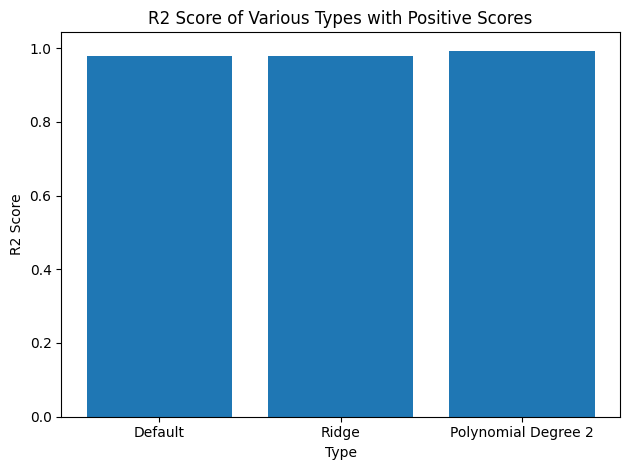



Type with the highest R2 score:
Polynomial Degree 2 : 0.9931242801205894


In [ ]:
# Filter rows with positive R2 scores
positive_r2_results = results_lin_list[results_lin_list['R2 Score'] > 0]

# Plot the graph
# plt.figure(figsize=(10, 6))
plt.bar(positive_r2_results['Type'], positive_r2_results['R2 Score'])
plt.xlabel('Type')
plt.ylabel('R2 Score')
plt.title('R2 Score of Various Types with Positive Scores')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('\n')

# Identify the row with the highest R2 score
max_r2_row = positive_r2_results.loc[positive_r2_results['R2 Score'].idxmax()]

# Print out the type with the highest R2 score
print("Type with the highest R2 score:")
print(max_r2_row['Type'], ":", max_r2_row[1])

###**AdaBoost Regression**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

learning_rates = [0.001, 0.01, 0.1]

# Initialize DataFrame to store results
results_ada = []

# Function to perform AdaBoost regression and calculate metrics
def adaboost_regression(X_train, X_test, y_train, y_test, learning_rate):
    # Initialize AdaBoost Regressor with specified learning rate
    adaboost = AdaBoostRegressor(learning_rate=learning_rate, random_state=42)

    # Fit the model
    adaboost.fit(X_train, y_train)

    # Predictions
    y_pred = adaboost.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_test, y_pred)

    # Cross validation
    # cv_scores = cross_val_score(adaboost, X, y, cv=5, scoring='r2').mean()

    # K-Fold validation
    # kf = KFold(n_splits=5)
    # kf_scores = cross_val_score(adaboost, X, y, cv=kf, scoring='r2').mean()

    # return r2, rmse, mae, cv_scores, kf_scores
    return r2, rmse, mae

# Loop through learning rates
for lr in learning_rates:
    # Perform AdaBoost regression and calculate metrics
    # r2, rmse, mae, cv_scores, kf_scores = adaboost_regression(X_train, X_test, y_train, y_test, lr)
    r2, rmse, mae = adaboost_regression(X_train, X_test, y_train, y_test, lr)

    # Append results to DataFrame
    # results = results.append({"Learning Rate": lr, "R2 Score": r2, "RMSE": rmse, "MAE": mae,
    #                           "Cross Val.": cv_scores, "KFold Val.": kf_scores}, ignore_index=True)
    results_ada.append({"Learning Rate": lr, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Convert list of results to DataFrame
results_ada_list = pd.DataFrame(results_ada)

# Display results
results_ada_list

,Learning Rate,R2 Score,RMSE,MAE
0,0.001,0.992985,0.041301,0.034330
1,0.010,0.991424,0.045666,0.038237
2,0.100,0.989563,0.050378,0.040813


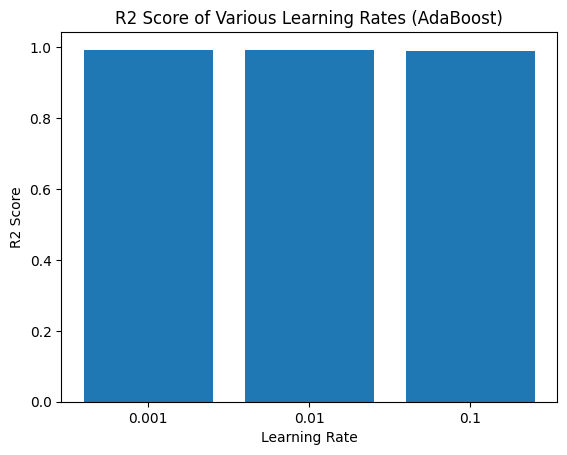



Learning Rate with the highest R2 score:
0.001 : 0.992985101381698


In [ ]:
# Filter rows with positive R2 scores
positive_r2_results_ada = results_ada_list[results_ada_list['R2 Score'] > 0]

# Convert learning rates to strings
learning_rates_str = positive_r2_results_ada['Learning Rate'].astype(str)

# Plot the graph
# plt.figure(figsize=(10, 6))
plt.bar(learning_rates_str, positive_r2_results_ada['R2 Score'])
plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.title('R2 Score of Various Learning Rates (AdaBoost)')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
print('\n')

# Identify the row with the highest R2 score
max_r2_row_ada = positive_r2_results_ada.loc[positive_r2_results_ada['R2 Score'].idxmax()]

# Print out the type with the highest R2 score
print("Learning Rate with the highest R2 score:")
print(max_r2_row_ada['Learning Rate'], ":", max_r2_row_ada['R2 Score'])

In [ ]:
# adaboost = AdaBoostRegressor(learning_rate=0.4, random_state=42)
# adaboost.fit(X_train, y_train)

# # Predictions
# y_pred = adaboost.predict(X_test)

# y_train_pred = adaboost.predict(X_train)

# # Evaluation metrics on training data
# r2_train = r2_score(y_train, y_train_pred)
# rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE

# r2 = r2_score(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)

# # Print evaluation metrics on training data
# print("Training Set Metrics:")
# print("R2 Score:", r2_train)
# print("RMSE:", rmse_train)

# # Compare with evaluation metrics on test data
# print("\nTest Set Metrics:")
# print("R2 Score:", r2)
# print("RMSE:", rmse)

# # Check if there is a significant difference between training and test metrics
# if (r2_train - r2) > 0.1 or (rmse - rmse_train) > 0.1:
#     print("\nThe model might be overfitting the data.")
# else:
#     print("\nThe model does not appear to be overfitting the data.")

###**Gradient Boosted Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rates = [0.001, 0.01, 0.1]

# Initialize DataFrame to store results
results_grad = []

# Function to perform Gradient Boosting Regression and calculate metrics
def gradient_boosting_regression(X_train, X_test, y_train, y_test, learning_rate):
    # Initialize Gradient Boosting Regressor with specified learning rate
    gb_regressor = GradientBoostingRegressor(learning_rate=learning_rate, random_state=42)

    # Fit the model
    gb_regressor.fit(X_train, y_train)

    # Predictions
    y_pred = gb_regressor.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_test, y_pred)

    # Cross validation
    # cv_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='r2').mean()

    # K-Fold validation
    # kf = KFold(n_splits=5)
    # kf_scores = cross_val_score(gb_regressor, X, y, cv=kf, scoring='r2').mean()

    # return r2, rmse, mae, cv_scores, kf_scores
    return r2, rmse, mae

# Loop through learning rates
for lr in learning_rates:
    # Perform Gradient Boosting Regression and calculate metrics
    # r2, rmse, mae, cv_scores, kf_scores = gradient_boosting_regression(X_train, X_test, y_train, y_test, lr)
    r2, rmse, mae = gradient_boosting_regression(X_train, X_test, y_train, y_test, lr)

    # Append results to DataFrame
    # results = results.append({"Learning Rate": lr, "R2 Score": r2, "RMSE": rmse, "MAE": mae,
    #                           "Cross Val.": cv_scores, "KFold Val.": kf_scores}, ignore_index=True)
    results_grad.append({"Learning Rate": lr, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Convert list of results to DataFrame
results_grad_list = pd.DataFrame(results_grad)

# Display results
results_grad_list

,Learning Rate,R2 Score,RMSE,MAE
0,0.001,0.183003,0.445715,0.368297
1,0.010,0.882242,0.169216,0.140622
2,0.100,0.998626,0.018279,0.010988


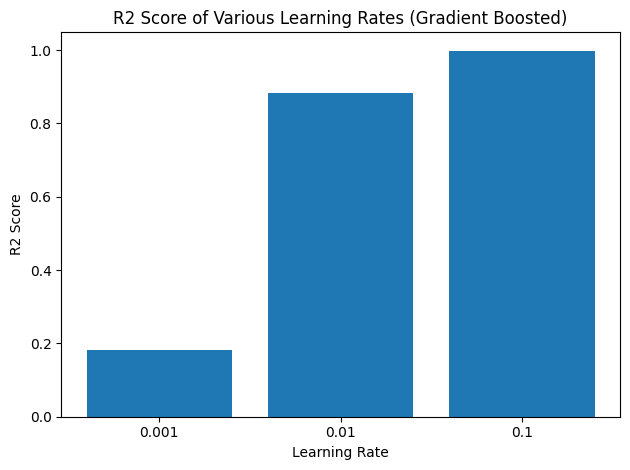



Learning Rate with the highest R2 score:
0.1 : 0.9986259130128597


In [ ]:
# Filter rows with positive R2 scores
positive_r2_results_gb = results_grad_list[results_grad_list['R2 Score'] > 0]

# Convert learning rates to strings
learning_rates_str_gb = positive_r2_results_gb['Learning Rate'].astype(str)

# Plot the graph
# plt.figure(figsize=(10, 6))
plt.bar(learning_rates_str_gb, positive_r2_results_gb['R2 Score'])
plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.title('R2 Score of Various Learning Rates (Gradient Boosted)')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n')

# Identify the row with the highest R2 score
max_r2_row_gb = positive_r2_results_gb.loc[positive_r2_results_gb['R2 Score'].idxmax()]

# Print out the type with the highest R2 score
print("Learning Rate with the highest R2 score:")
print(max_r2_row_gb['Learning Rate'], ":", max_r2_row_gb['R2 Score'])

In [ ]:
#----------------------------------------------------------------------------------------
# gb_regressor = GradientBoostingRegressor(n_estimators=100,          # Number of boosting stages (trees)
#                                          learning_rate=0.7,        # Learning rate (shrinkage)
#                                          max_depth=3,              # Maximum depth of individual trees
#                                          min_samples_split=2,      # Minimum number of samples required to split a node
#                                          min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
#                                          subsample=1.0,            # Subsample ratio of the training instances
#                                          max_features=None,        # Number of features to consider for the best split
#                                          random_state=42)
#-------------------------------------------------------------------------------------------

# gb_regressor = GradientBoostingRegressor(learning_rate=0.1, random_state=42)
# gb_regressor.fit(X_train, y_train)

# # Predictions
# y_pred = gb_regressor.predict(X_test)

# y_train_pred = gb_regressor.predict(X_train)

# # Evaluation metrics on training data
# r2_train = r2_score(y_train, y_train_pred)
# rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE

# # Print evaluation metrics on training data
# print("Training Set Metrics:")
# print("R2 Score:", r2_train)
# print("RMSE:", rmse_train)

# # Compare with evaluation metrics on test data
# print("\nTest Set Metrics:")
# print("R2 Score:", r2)
# print("RMSE:", rmse)

# # Check if there is a significant difference between training and test metrics
# if (r2_train - r2) > 0.1 or (rmse - rmse_train) > 0.1:
#     print("\nThe model might be overfitting the data.")
# else:
#     print("\nThe model does not appear to be overfitting the data.")

###**Random Forest Regression**


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define values for max_features
max_features_values = ['auto', 'sqrt', 'log2']

# Initialize DataFrame to store results
results_rf = []

# Function to perform Random Forest Regression and calculate metrics
def random_forest_regression(X_train, X_test, y_train, y_test, max_features):
    # Initialize Random Forest Regressor with specified max_features
    rf_regressor = RandomForestRegressor(max_features=max_features, random_state=42)

    # Fit the model
    rf_regressor.fit(X_train, y_train)

    # Predictions
    y_pred = rf_regressor.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_test, y_pred)

    # Cross validation
    # cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2').mean()

    # K-Fold validation
    # kf = KFold(n_splits=5)
    # kf_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2').mean()

    # return r2, rmse, mae, cv_scores, kf_scores
    return r2, rmse, mae

# Loop through max_features values
for max_features_value in max_features_values:
    # Perform Random Forest regression and calculate metrics
    # r2, rmse, mae, cv_scores, kf_scores = random_forest_regression(X_train, X_test, y_train, y_test, max_features_value)
    r2, rmse, mae = random_forest_regression(X_train, X_test, y_train, y_test, max_features_value)

    # Append results to DataFrame
    # results = results.append({"Max Features": max_features_value, "R2 Score": r2, "RMSE": rmse, "MAE": mae,
    #                           "Cross Val.": cv_scores, "KFold Val.": kf_scores}, ignore_index=True)
    results_rf.append({"Max Features": max_features_value, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Convert list of results to DataFrame
results_rf_list = pd.DataFrame(results_rf)

# Display results
results_rf_list

,Max Features,R2 Score,RMSE,MAE
0,auto,0.999560,0.010345,0.007773
1,sqrt,0.999528,0.010710,0.007421
2,log2,0.999528,0.010710,0.007421


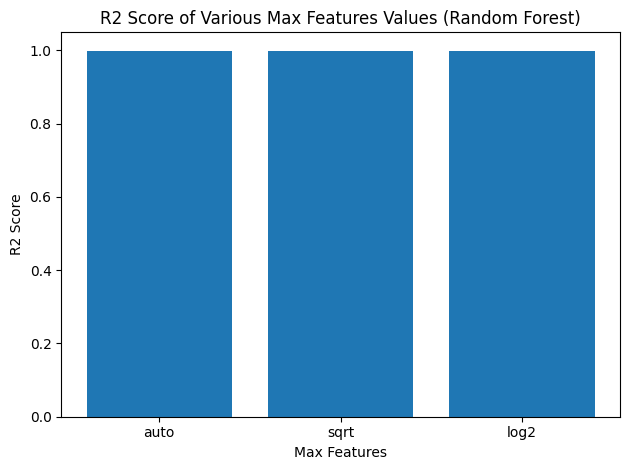



Max Features value with the highest R2 score:
auto : 0.9995598779540019


In [ ]:
# Filter rows with positive R2 scores
positive_r2_results_rf = results_rf_list[results_rf_list['R2 Score'] > 0]

# Plot the graph
# plt.figure(figsize=(10, 6))
plt.bar(positive_r2_results_rf['Max Features'], positive_r2_results_rf['R2 Score'])
plt.xlabel('Max Features')
plt.ylabel('R2 Score')
plt.title('R2 Score of Various Max Features Values (Random Forest)')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n')

# Identify the row with the highest R2 score
max_r2_row_rf = positive_r2_results_rf.loc[positive_r2_results_rf['R2 Score'].idxmax()]

# Print out the max features value with the highest R2 score
print("Max Features value with the highest R2 score:")
print(max_r2_row_rf['Max Features'], ":", max_r2_row_rf['R2 Score'])

###**MultiLayer Perceptron**

In [ ]:
from sklearn.neural_network import MLPRegressor

# Define Optimizer
solvers = ['adam', 'lbfgs', 'sgd']

# Initialize DataFrame to store results
results_mlp = []

# Function to perform MLP regression and calculate metrics
def mlp_regression(X_train, X_test, y_train, y_test, solver):
    # Initialize MLP Regressor with specified solver
    # mlp_regressor = MLPRegressor(solver=solver,alpha=3, hidden_layer_sizes=(100, 200, 50, 70, 60, 100, 50), learning_rate='adaptive',learning_rate_init=0.001, activation='relu', random_state=10, max_iter = 500)
    mlp_regressor = MLPRegressor(solver=solver, hidden_layer_sizes=(100, 200, 50, 70), random_state=42)

    # Fit the model
    mlp_regressor.fit(X_train, y_train)

    # Predictions
    y_pred = mlp_regressor.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_test, y_pred)

    # Cross validation
    # cv_scores = cross_val_score(mlp_regressor, X, y, cv=5, scoring='r2').mean()

    # K-Fold validation
    # kf = KFold(n_splits=5)
    # kf_scores = cross_val_score(mlp_regressor, X, y, cv=kf, scoring='r2').mean()

    # return r2, rmse, mae, cv_scores, kf_scores
    return r2, rmse, mae

# Loop through solvers
for solver in solvers:
    # Perform MLP regression and calculate metrics
    # r2, rmse, mae, cv_scores, kf_scores = mlp_regression(X_train, X_test, y_train, y_test, solver)
    r2, rmse, mae = mlp_regression(X_train, X_test, y_train, y_test, solver)

    # Append results to DataFrame
    # results = results.append({"Solver": solver, "R2 Score": r2, "RMSE": rmse, "MAE": mae,
    #                           "Cross Val.": cv_scores, "KFold Val.": kf_scores}, ignore_index=True)
    results_mlp.append({"Solver": solver, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

# Convert list of results to DataFrame
results_mlp_list = pd.DataFrame(results_mlp)

# Display results
results_mlp_list

,Solver,R2 Score,RMSE,MAE
0,adam,0.961249,0.097070,0.075546
1,lbfgs,0.996120,0.030716,0.019296
2,sgd,0.944707,0.115953,0.100569


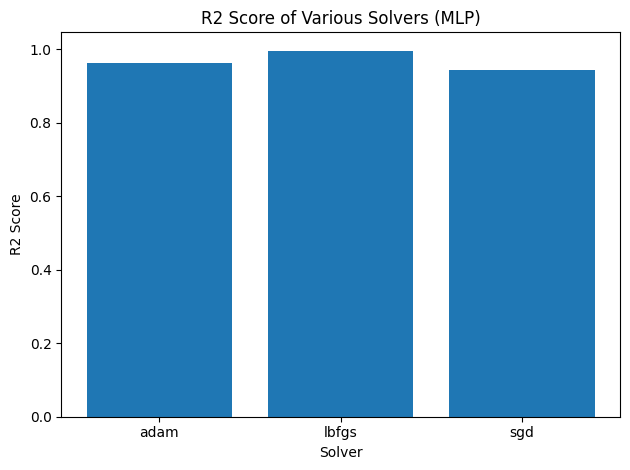



Solver with the highest R2 score:
lbfgs : 0.9961199594055746


In [ ]:
# Filter rows with positive R2 scores
positive_r2_results_mlp = results_mlp_list[results_mlp_list['R2 Score'] > 0]

# Plot the graph
# plt.figure(figsize=(10, 6))
plt.bar(positive_r2_results_mlp['Solver'], positive_r2_results_mlp['R2 Score'])
plt.xlabel('Solver')
plt.ylabel('R2 Score')
plt.title('R2 Score of Various Solvers (MLP)')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('\n')

# Identify the row with the highest R2 score
max_r2_row_mlp = positive_r2_results_mlp.loc[positive_r2_results_mlp['R2 Score'].idxmax()]

# Print out the solver with the highest R2 score
print("Solver with the highest R2 score:")
print(max_r2_row_mlp['Solver'], ":", max_r2_row_mlp['R2 Score'])

In [ ]:
# regr_nn = MLPRegressor(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons, respectively
#                               activation='relu',            # Rectified Linear Unit activation function
#                               solver='adam',                # Adam optimizer
#                               alpha=0.0001,                 # L2 regularization parameter
#                               learning_rate='constant',     # Constant learning rate
#                               learning_rate_init=0.001,     # Initial learning rate
#                               max_iter=200,                 # Maximum number of iterations
#                               batch_size='auto',            # Batch size for optimization
#                               early_stopping=False,         # Disable early stopping
#                               validation_fraction=0.1,      # Fraction of training data for validation
#                               beta_1=0.9,                   # Adam optimizer parameter
#                               beta_2=0.999,                 # Adam optimizer parameter
#                               epsilon=1e-08,                # Adam optimizer parameter
#                               shuffle=True,                 # Shuffle training data
#                               random_state=42)

###**Conclusion**

In [ ]:
# Extract values
linear_regression_values = [max_r2_row[1], max_r2_row[2], max_r2_row[3]]
adaboost_values = [max_r2_row_ada[1], max_r2_row_ada[2], max_r2_row_ada[3]]
gradient_boosting_values = [max_r2_row_gb[1], max_r2_row_gb[2], max_r2_row_gb[3]]
random_forest_values = [max_r2_row_rf[1], max_r2_row_rf[2], max_r2_row_rf[3]]
mlp_values = [max_r2_row_mlp[1], max_r2_row_mlp[2], max_r2_row_mlp[3]]

# Create a dictionary with the extracted values
data = {
    "Algorithm": ["Linear Regression", "Adaboost", "Gradient Boosted Regression", "Random Forest Regression", "MLP"],
    "R2 Score": [linear_regression_values[0], adaboost_values[0], gradient_boosting_values[0], random_forest_values[0], mlp_values[0]],
    "RMSE": [linear_regression_values[1], adaboost_values[1], gradient_boosting_values[1], random_forest_values[1], mlp_values[1]],
    "MAE": [linear_regression_values[2], adaboost_values[2], gradient_boosting_values[2], random_forest_values[2], mlp_values[2]]
}

# Create a DataFrame
results_table = pd.DataFrame(data)

# Display the table
results_table

,Algorithm,R2 Score,RMSE,MAE
0,Linear Regression,0.993124,0.040889,0.025301
1,Adaboost,0.992985,0.041301,0.034330
2,Gradient Boosted Regression,0.998626,0.018279,0.010988
3,Random Forest Regression,0.999560,0.010345,0.007773
4,MLP,0.996120,0.030716,0.019296


In [ ]:
# Assign rankings based on each metric
results_table['R2 Score Rank'] = results_table['R2 Score'].rank(ascending=False)
results_table['RMSE Rank'] = results_table['RMSE'].rank(ascending=True)
results_table['MAE Rank'] = results_table['MAE'].rank(ascending=True)

# Calculate Overall Ranking
results_table['Overall Ranking'] = results_table['R2 Score Rank'] + results_table['RMSE Rank'] + results_table['MAE Rank']

# Display the table
results_table

,Algorithm,R2 Score,RMSE,MAE,R2 Score Rank,RMSE Rank,MAE Rank,Overall Ranking
0,Linear Regression,0.993124,0.040889,0.025301,4.0,4.0,4.0,12.0
1,Adaboost,0.992985,0.041301,0.034330,5.0,5.0,5.0,15.0
2,Gradient Boosted Regression,0.998626,0.018279,0.010988,2.0,2.0,2.0,6.0
3,Random Forest Regression,0.999560,0.010345,0.007773,1.0,1.0,1.0,3.0
4,MLP,0.996120,0.030716,0.019296,3.0,3.0,3.0,9.0


Best Algorithm based on lowest overall ranking: Random Forest Regression




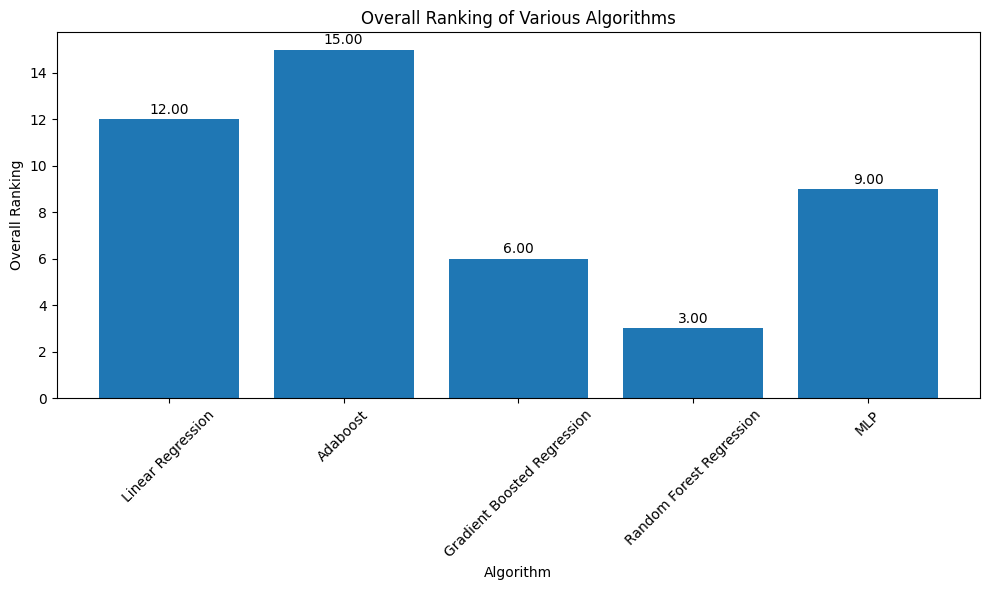

In [ ]:
# Find the algorithm with the lowest overall ranking
best_algorithm = results_table.loc[results_table['Overall Ranking'].idxmin(), 'Algorithm']

# Print the best algorithm
print("Best Algorithm based on lowest overall ranking:", best_algorithm)
print('\n')

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(results_table['Algorithm'], results_table['Overall Ranking'])

# Add individual scores on the bars
for i, score in enumerate(results_table['Overall Ranking']):
    plt.text(i, score + 0.1, f"{score:.2f}", ha='center', va='bottom')

plt.xlabel('Algorithm')
plt.ylabel('Overall Ranking')
plt.title('Overall Ranking of Various Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()